# Define Train and Validate the models

This notebook uses the csv from the data dir as input and builds, trains and predicts a model using keras.

In [1]:
#TODO:
# Broke the model training when removed the logs.
# sigh. put back



#TODO
# Get rid of all the tensorboard stuff for this simple demo
# * rm logdir done
# * rm callback done
# * etc.
#
# Fix the fqpn and use relative? Will this break tensorboard? Cloud based environments?
# How about where you don't have "dirs" like in watson and have assets instead?

In [2]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import os.path


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
print(tf.__version__)

2.13.0


In [8]:
# The current directory will be where this src file is located.
# Which is in the src dir of the project
dirpath = os.getcwd()
print("current directory is : " + dirpath)

current directory is : /Users/davis/progs/github/Keras-Philosophy/src


In [9]:
root_path = os.path.dirname(dirpath)
print("parent directory is : " + root_path)

parent directory is : /Users/davis/progs/github/Keras-Philosophy


In [10]:
data_path = root_path + "/data"
print("data_path is : " + data_path)

data_path is : /Users/davis/progs/github/Keras-Philosophy/data


In [11]:
log_path = root_path + "/logs/"
# logs needs to be used by the shell commands also
os.environ['LOG_DIR_NAME'] = log_path

print("log direcotry is: " + log_path)

log direcotry is: /Users/davis/progs/github/Keras-Philosophy/logs/


In [13]:
%%bash
echo "LOG_DIR_NAME: ${LOG_DIR_NAME}"

LOG_DIR_NAME: /Users/davis/progs/github/Keras-Philosophy/logs/


In [14]:
train_csv = data_path + "/train.csv"
test_csv = data_path + "/test.csv"
valid_csv = data_path + "/valid.csv"

# Read the dataframes using pandas

In [17]:
# Read the csv files into dataframes
normed_train_df = pd.read_csv(train_csv, 
                          header=0,
                          sep=",")
normed_valid_df = pd.read_csv(valid_csv, 
                          header=0,
                          sep=",")
normed_test_df = pd.read_csv(test_csv, 
                          header=0,
                          sep=",")

In [18]:
# Create vectors of the training labels
# assumes Y label is called z
# 
train_labels = normed_train_df.pop('z')
test_labels = normed_test_df.pop('z')
valid_labels = normed_valid_df.pop('z')

In [20]:
train_labels

0      10.0
1      10.0
2      10.0
3      10.0
4      10.0
       ... 
625    10.0
626    10.0
627    10.0
628    10.0
629    10.0
Name: z, Length: 630, dtype: float64

In [21]:
normed_train_df.keys()

Index(['x', 'y'], dtype='object')

# Build the model

In [23]:
# train_ds determines the input feature size


# Build a 2 layer 64 node DNN
#model = keras.Sequential([
#    layers.Dense(64, activation=tf.nn.relu, input_shape=[len(normed_train_ds.keys())]),
#    layers.Dense(64, activation=tf.nn.relu),
#    layers.Dense(1)
#    ])

# Build a 3 layer 64, 16, 4 node DNN
#model = keras.Sequential([
#    layers.Dense(64, activation=tf.nn.relu, input_shape=[len(normed_train_ds.keys())]),
#    layers.Dense(16, activation=tf.nn.relu),
#    layers.Dense(4, activation=tf.nn.relu),
#    layers.Dense(1)
#    ])


# Build a 2 layer 16, 4 node DNN
model = keras.Sequential([
    layers.Dense(16, activation=tf.nn.relu, input_shape=[len(normed_train_df.keys())]),
    layers.Dense(4, activation=tf.nn.relu),
    layers.Dense(1)
    ])




# Create a 1 layer 12 node DNN
#model = keras.Sequential([
#    layers.Dense(12, activation=tf.nn.relu, input_shape=[len(normed_train_ds.keys())]),
#    layers.Dense(1)
#    ])



# orig
#optimizer = tf.keras.optimizers.RMSprop(0.001)
# increase learning rate if fairly consistent but slow changing
#optimizer = tf.keras.optimizers.RMSprop(0.01)
# 0.1 is too big
#optimizer = tf.keras.optimizers.RMSprop(0.1)
# with the early stop, lets try to make the learning rate smaller
optimizer = tf.keras.optimizers.RMSprop(0.0001)

# Add in the early stop code
# The patience parameter is the amount of epochs to check for improvement
#
# NOTE: This was a good addition.  I'm so used to running through a lot of steps
# I did not realize that it was finding its best results so early.  In the 
# graphs that follows, you can see the divergent graphs here where the others
# did not show it since it was hundreds of epochs past optimal.
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)



model.compile(loss='mean_squared_error',
              optimizer=optimizer,
              metrics=['mean_absolute_error', 'mean_squared_error'])


# Train the model (with three callbacks)

In [27]:
EPOCHS = 1000

In [28]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

In [29]:
#                    batch_size=16,

history = model.fit(normed_train_df, 
                    train_labels,
                    epochs=EPOCHS,
                    validation_data = (normed_valid_df, valid_labels),
                    verbose=0,
                    callbacks=[early_stop, PrintDot()])


....................................................................................................
....................................................................................................
..............................................................................................

In [30]:
# TODO:
# I broke the history plots

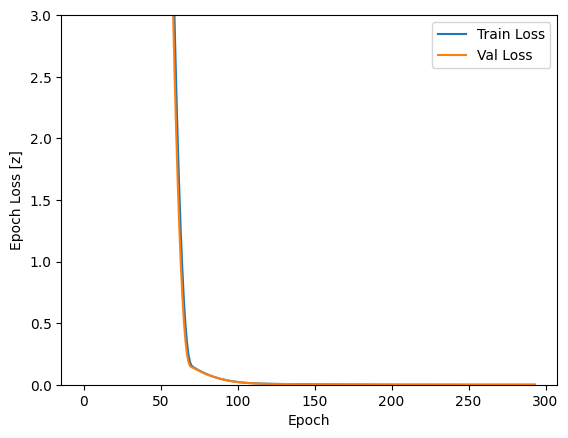

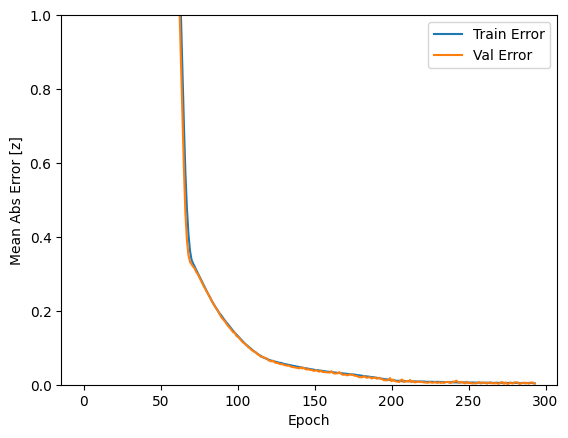

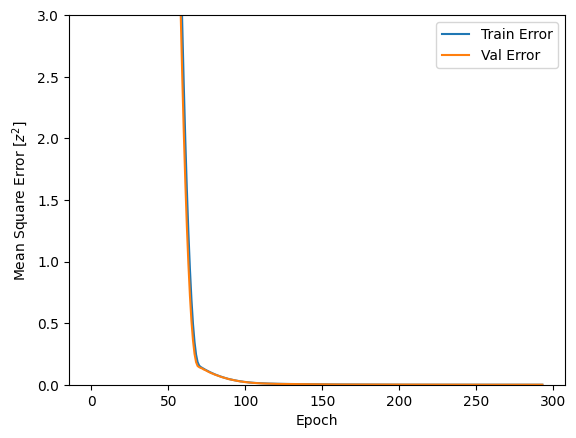

In [31]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch


    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Epoch Loss [z]')
    plt.plot(hist['epoch'], hist['loss'],label='Train Loss')
    plt.plot(hist['epoch'], hist['val_loss'],label = 'Val Loss')
    plt.ylim([0,3])
    plt.legend()


    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [z]')
    plt.plot(hist['epoch'], hist['mean_absolute_error'],label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_absolute_error'],label = 'Val Error')
    plt.ylim([0,1])
    plt.legend()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$z^2$]')
    plt.plot(hist['epoch'], hist['mean_squared_error'],label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_squared_error'],label = 'Val Error')
    plt.ylim([0,3])
    plt.legend()
    plt.show()


plot_history(history)

In [32]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

In [33]:
hist

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
0,82.512802,9.033771,82.512802,82.438187,9.026906,82.438187,0
1,80.952774,8.943842,80.952774,81.030312,8.945762,81.030312,1
2,79.568680,8.863180,79.568680,79.582321,8.862099,79.582321,2
3,78.186264,8.781839,78.186264,78.050224,8.773123,78.050224,3
4,76.781967,8.698385,76.781967,76.552475,8.685013,76.552475,4
...,...,...,...,...,...,...,...
289,0.000032,0.004878,0.000032,0.000013,0.002627,0.000013,289
290,0.000027,0.004443,0.000027,0.000041,0.005821,0.000041,290
291,0.000035,0.004953,0.000035,0.000036,0.005555,0.000036,291
292,0.000025,0.004084,0.000025,0.000038,0.005666,0.000038,292


Now we are getting reasonable results.  Using a smaller learning rate, with an early stop callback.

# Evauate model
Note by including the data with missing values and adding in average amounts increased the error.

In [34]:
loss, mae, mse = model.evaluate(normed_test_df, test_labels, verbose=0)

print("Testing set Mean Abs Error: {:5.2f} predicted xxt".format(mae))

Testing set Mean Abs Error:  0.00 predicted xxt


# Make predictions

5/5 [==============================] - 0s 565us/step


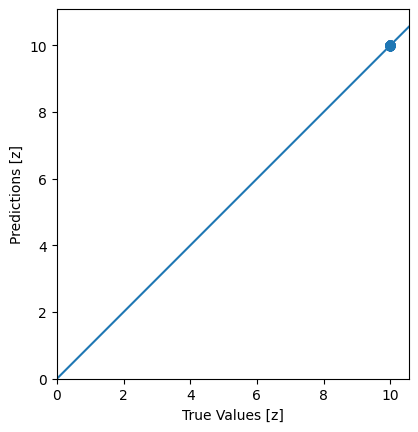

In [35]:
test_predictions = model.predict(normed_test_df).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [z]')
plt.ylabel('Predictions [z]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

Look at error distribution

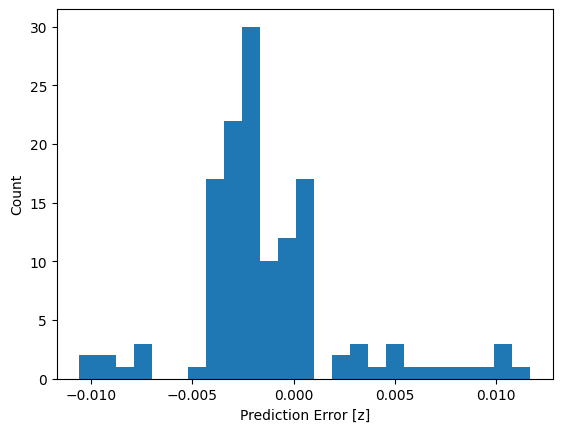

In [36]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [z]")
_ = plt.ylabel("Count")

In [39]:
normed_valid_df


,x,y
0,4.240666,5.759334
1,8.501660,1.498340
2,2.501660,7.498340
3,9.204605,0.795395
4,3.204605,6.795395
...,...,...
130,7.100706,2.899294
131,4.649121,5.350879
132,5.406296,4.593704
133,4.406296,5.593704


In [40]:
model.predict(normed_valid_df)

5/5 [==============================] - 0s 671us/step


array([[ 9.998712 ],
       [ 9.9969425],
       [ 9.994845 ],
       [ 9.996389 ],
       [ 9.997503 ],
       [ 9.998638 ],
       [ 9.998447 ],
       [ 9.997868 ],
       [ 9.998085 ],
       [ 9.999916 ],
       [ 9.99875  ],
       [ 9.996461 ],
       [ 9.998035 ],
       [10.0009   ],
       [ 9.998564 ],
       [ 9.996511 ],
       [ 9.998086 ],
       [ 9.995783 ],
       [ 9.998146 ],
       [ 9.989589 ],
       [ 9.998352 ],
       [ 9.99197  ],
       [ 9.996423 ],
       [10.000013 ],
       [10.007598 ],
       [ 9.9959955],
       [ 9.997569 ],
       [10.003695 ],
       [ 9.9996395],
       [10.000035 ],
       [10.0009   ],
       [ 9.997245 ],
       [ 9.999738 ],
       [ 9.99857  ],
       [ 9.997253 ],
       [ 9.998039 ],
       [ 9.999726 ],
       [ 9.999765 ],
       [ 9.999796 ],
       [ 9.99746  ],
       [ 9.99785  ],
       [10.005952 ],
       [ 9.997956 ],
       [10.000744 ],
       [ 9.997453 ],
       [ 9.999372 ],
       [ 9.998205 ],
       [ 9.99